In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Real Breast Cancer Data.csv")
print(data.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Mo

In [43]:
print(data.isnull().sum())

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [44]:
data = data.dropna()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [46]:
print(data.Gender.value_counts())

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64


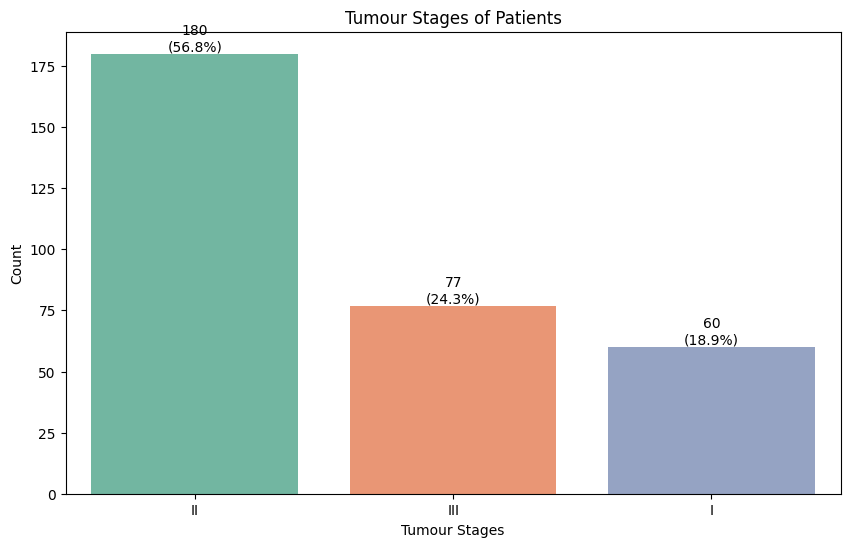

In [47]:
# Tumour Stage
stage = data["Tumour_Stage"].value_counts()
total_patients = len(data)

plt.figure(figsize=(10, 6))

sns.countplot(data=data, x="Tumour_Stage", order=stage.index, palette="Set2")
plt.title("Tumour Stages of Patients")
plt.xlabel("Tumour Stages")
plt.ylabel("Count")

for i in range(len(stage)):
    plt.text(x=i, y=stage[i], s=f"{stage[i]}\n({stage[i]/total_patients*100:.1f}%)", ha='center', va='bottom')

plt.show()


(-1.0999983061590695,
 1.0999998199258056,
 -1.099999851771497,
 1.0999994975457517)

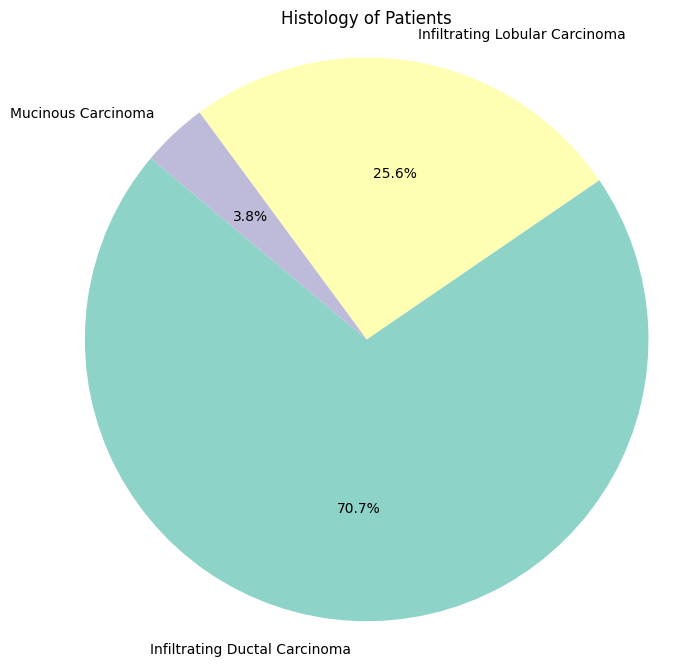

In [48]:
# Histology
histology = data["Histology"].value_counts()

plt.figure(figsize=(8, 8))
sns.set_palette("Set3")  
plt.pie(histology, labels=histology.index, autopct='%1.1f%%', startangle=140)
plt.title("Histology of Patients") 
plt.axis('equal')  


In [49]:
# ER status
print(data["ER status"].value_counts())
# PR status
print(data["PR status"].value_counts())
# HER2 status
print(data["HER2 status"].value_counts())

ER status
Positive    317
Name: count, dtype: int64
PR status
Positive    317
Name: count, dtype: int64
HER2 status
Negative    288
Positive     29
Name: count, dtype: int64


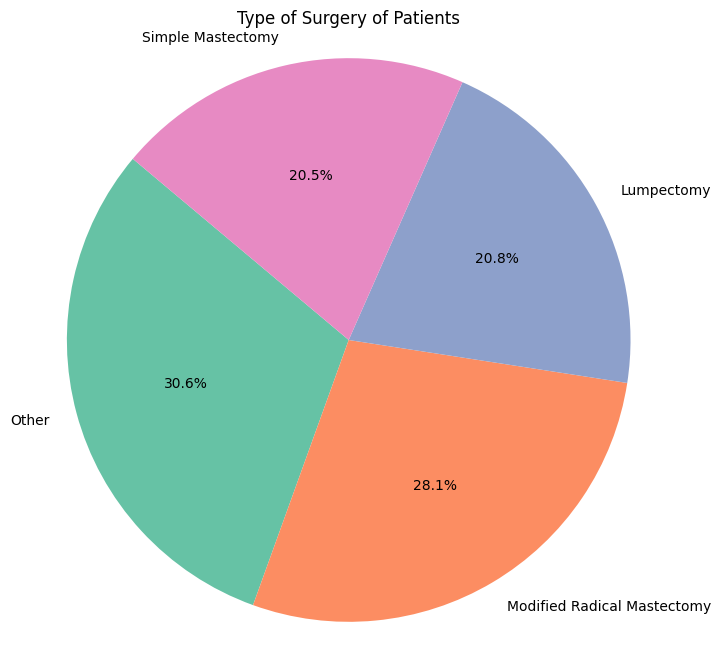

In [50]:
# Chirurgietyp
surgery = data["Surgery_type"].value_counts()

plt.figure(figsize=(8, 8))
sns.set_palette("Set2") 
plt.pie(surgery, labels=surgery.index, autopct='%1.1f%%', startangle=140)
plt.title("Type of Surgery of Patients")
plt.axis('equal')  
plt.show()

In [51]:
data["Tumour_Stage"] = data["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
data["Histology"] = data["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
data["ER status"] = data["ER status"].map({"Positive": 1})
data["PR status"] = data["PR status"].map({"Positive": 1})
data["HER2 status"] = data["HER2 status"].map({"Positive": 1, "Negative": 2})
data["Gender"] = data["Gender"].map({"MALE": 0, "FEMALE": 1})
data["Surgery_type"] = data["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
print(data.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0       1  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0       1 -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0       1  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0       1  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0       1  0.221550   1.90680   0.52045 -0.311990   

   Tumour_Stage  Histology  ER status  PR status  HER2 status  Surgery_type  \
0             3          1          1          1            2             2   
1             2          3          1          1            2             3   
2             3          1          1          1            2             1   
3             2          1          1          1            2             2   
4             2          1          1          1            2             1   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       15-Jan-17          19-Ju

In [52]:
# Splitting data
x = np.array(data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']])
y = np.array(data[['Patient_Status']])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=42)

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=42)

# Modelle initialisieren
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Genauigkeit für jedes Modell zeigen
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    print(f"{name}: {accuracy}")


SVM: 0.8333333333333334
Random Forest: 0.8333333333333334
Gradient Boosting: 0.8541666666666666
KNN: 0.75
Naive Bayes: 0.8125
Decision Tree: 0.6458333333333334
Logistic Regression: 0.8333333333333334


- SVM: 0.833
- Random Forest: 0.833
- Gradient Boosting: 0.854
- KNN: 0.750
- Naive Bayes: 0.812
- Entscheidungsbaum: 0.667
- Logistische Regression: 0.833

Die Genauigkeiten zeigen, wie gut jedes Modell die Testdaten vorhersagen kann. In diesem Fall hat das Gradient Boosting-Modell die höchste Genauigkeit mit 85,4%, gefolgt von SVM und logistischer Regression mit jeweils 83,3%. Der Entscheidungsbaum hat die niedrigste Genauigkeit mit 66,7%. Je höher die Genauigkeit, desto besser ist die Leistung des Modells bei der Vorhersage der Testdaten.

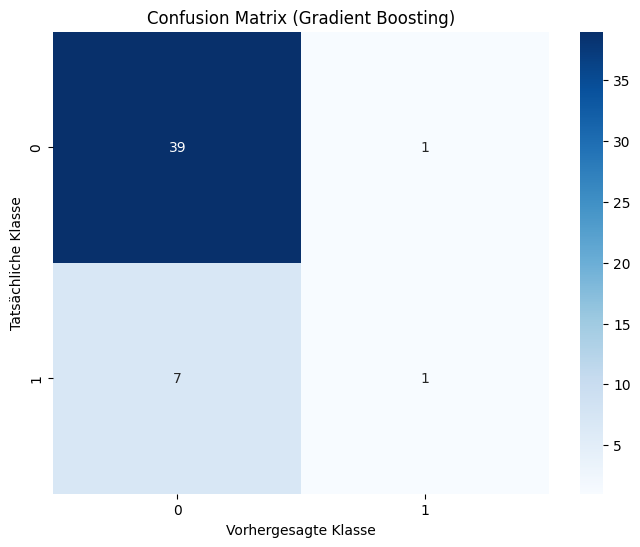

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        40
           1       0.50      0.12      0.20         8

    accuracy                           0.83        48
   macro avg       0.67      0.55      0.55        48
weighted avg       0.79      0.83      0.79        48



In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(xtrain, ytrain)

y_pred = gradient_boosting_model.predict(xtest)

cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

report = classification_report(ytest, y_pred, target_names=["0", "1"])
print("Classification Report (Gradient Boosting):")
print(report)

- **Präzision (precision)**: Die Präzision gibt an, wie viele der als positiv vorhergesagten Instanzen tatsächlich positiv waren.
  - Klasse 0 (Negative Klasse): 85% der vorhergesagten negativen Instanzen waren tatsächlich negativ.
  - Klasse 1 (Positive Klasse): 100% der vorhergesagten positiven Instanzen waren tatsächlich positiv.

- **Recall (Sensitivität)**: Der Recall gibt an, wie viele der tatsächlich positiven Instanzen richtig identifiziert wurden.
  - Klasse 0: 100% der tatsächlich negativen Instanzen wurden korrekt identifiziert.
  - Klasse 1: Nur 12% der tatsächlich positiven Instanzen wurden korrekt identifiziert.

- **F1-Score**: Der F1-Score ist ein gewichteter Durchschnitt von Präzision und Recall und bietet eine einzige Metrik zur Bewertung der Klassifikatorleistung.
  - Klasse 0: F1-Score von 0.92 (hoher Wert, da sowohl Präzision als auch Recall hoch sind).
  - Klasse 1: F1-Score von 0.22 (niedriger Wert, da Recall sehr niedrig ist).

- **Unterstützung (Support)**: Die Anzahl der Instanzen in jeder Klasse.

- **Genauigkeit (Accuracy)**: Die Gesamtgenauigkeit des Modells, wie viele Instanzen korrekt klassifiziert wurden.
  - Genauigkeit: 85%

- **Macro Avg und Weighted Avg**:
  - **Macro Avg**: Der Durchschnitt der Metriken für jede Klasse, unabhängig von der Klassegröße.
  - **Weighted Avg**: Der Durchschnitt der Metriken für jede Klasse, gewichtet nach der Anzahl der Instanzen in jeder Klasse.

Diese Zusammenfassung zeigt, dass das Gradient Boosting-Modell eine hohe Präzision für Klasse 0 aufweist, jedoch eine niedrige Sensitivität für Klasse 1. Es hat eine hohe Genauigkeit, aber der F1-Score für Klasse 1 ist relativ niedrig. Dies könnte darauf hinweisen, dass das Modell Schwierigkeiten hat, die positive Klasse korrekt zu erkennen. Es wäre wichtig, diese Ergebnisse weiter

# Test the Model

In [55]:
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2]])

predicted_status = models["Gradient Boosting"].predict(features)

print(predicted_status)

['Alive']
